# Thompson Sampling

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
data=pd.read_csv('Ads_CTR_Optimisation.csv')
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing Thompson Sampling

In [17]:
# goal: find the ad with the highest conversion
import random ## random draw of distribution
N=500 # number of users
d=10 # number of ads
ads_selected=[]#empty for now ads which are going to be selected during rounds

number_of_rewards_1=[0]*d # the number of times the ad i got reward 1 up to round n
number_of_rewards_0 = [0]*d # the number of times the ad i got reward 0 up to round n
total_reward=0

##iterate for 10000 rounds
for n in range(0,N):
    ad=0 # will have an index of the selected ad
    max_random=0 
    
    for i in range(0,d): # going through ads
        # For each ad i we take a random draw from the beta distribution
        random_beta= random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
        if (random_beta > max_random):
            max_random=random_beta
            ad=i
    ads_selected.append(ad)
    reward=data.values[n,ad]
    if reward==1:
        number_of_rewards_1[ad]= number_of_rewards_1[ad]+1
    else:
        number_of_rewards_0[ad]= number_of_rewards_0[ad]+1
    total_reward=total_reward + reward

## Visualising the results - Histogram

Text(0, 0.5, 'Number of times each ad has been selected')

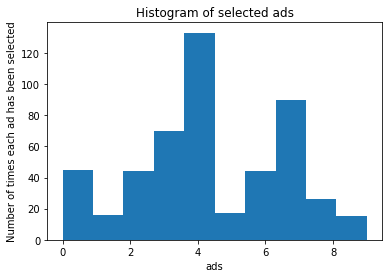

In [18]:
plt.hist(ads_selected);
plt.title ("Histogram of selected ads")
plt.xlabel('ads')
plt.ylabel('Number of times each ad has been selected')

